# 非線性分類(Non-linear Classification)

##### 先引入我們需要的packages

In [65]:
import os 
import numpy as np
import random
import matplotlib.pyplot as plt
import math

##### 設定我們有100個點，其中50個是圈圈，50個是叉叉

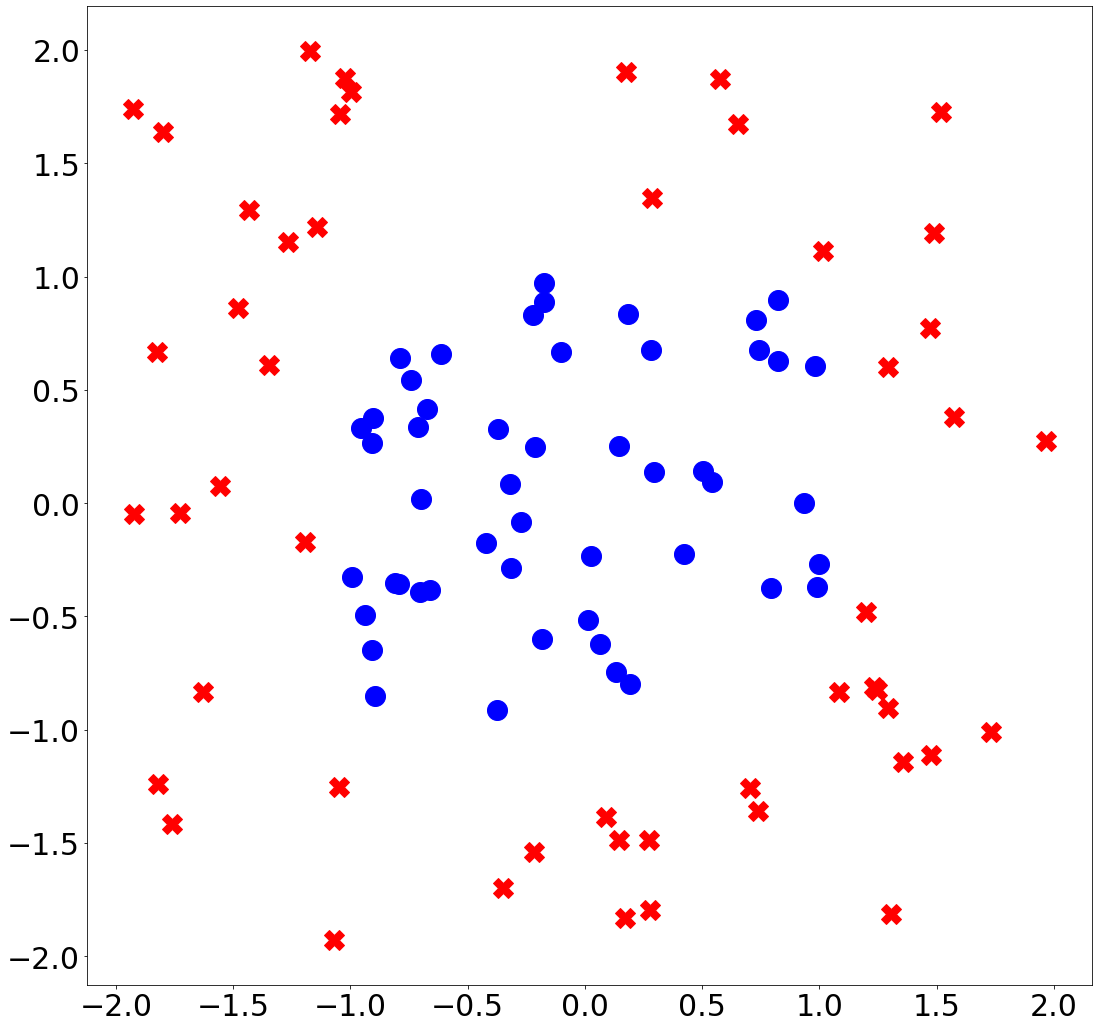

In [66]:
# 這裡我們建立一個100*2的矩陣x
# 100代表我們有100個點，2代表為2維空間(平面)
x=np.zeros((100,2))
# 這裡我們建立一個長度100的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(100)
# 因為有100筆資料，所以跑100個迴圈
for i in range(0,100): 
    # 標記y前半段0~49為圈圈(+1)，後半段50~99為叉叉(-1)
    # 也就是圈圈50個點，叉叉50個點
    f=1
    if(i<50):
        y[i]=1
        x[i,0],x[i,1]=random.uniform(-f,f),random.uniform(-f,f)
    else:
        y[i]=-1
        # 這邊為了讓我們的叉叉分布均勻一點用了一點小技巧
        if(i%4==0):
            x[i,0],x[i,1]=random.uniform(f,2*f),random.uniform(-f,2*f)
        elif(i%4==1):
            x[i,0],x[i,1]=random.uniform(-f,-2*f),random.uniform(-2*f,f)
        elif(i%4==2):
            x[i,0],x[i,1]=random.uniform(-2*f,f),random.uniform(f,2*f)
        else:
            x[i,0],x[i,1]=random.uniform(-f,2*f),random.uniform(-f,-2*f)
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[50:,0],x[50:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# 特徵轉換(Feature Transform)

In [67]:
feat_x=np.zeros((100,6))
feat_x[:,0]=np.ones(100)
feat_x[:,1]=x[:,0]
feat_x[:,2]=x[:,1]
feat_x[:,3]=x[:,0]**2
feat_x[:,4]=x[:,1]**2
feat_x[:,5]=x[:,0]*x[:,1]

##### 定義我們一些會需要用的方程式
##### (1) Sign function (2) 找錯誤點的方程式 (3) 計算錯誤點個數的方程式 (4) 繪圖方程式

In [68]:
# 這裡我們定義我們的sign function
def sign(w,x):
    # np.dot(w,x)=w0*x0+w1*x1+w2*x2
    # 所以當大於0，我們回傳一，反之則-1
    if(np.dot(w,x)>0):
        return 1
    else:
        return -1
# 這裡我們定義我們尋找分類錯誤點的方程式
def search_error(w,x):
    # 我們用while迴圈跑
    while True:
        # 這裡我們從0~99隨機挑一個數字
        # 也就是我們100個點隨機挑一個
        i=random.randint(0,99)
        # 這裡我們check他有沒有分類錯誤
        if(sign(w,x[i,:])!=y[i]):
            # 找到錯的之後，我們分別把這個點
            # 的位置和是否為圈圈或叉叉記下來
            err_x=x[i,:]
            err_y=y[i]
            # 然後結束我們的while迴圈
            break
        # 沒有分類錯誤，就繼續隨機挑直到找到錯為止
    # 最後回傳我們的錯誤點資訊
    return err_x,err_y
# 這裡我們定義計算錯誤點數的方程式
def compute_error(w,x):
    # 初始化
    err=0
    # 檢查全部的點
    for i in range(0,100):
        # 如果分類錯了，就+1個
        if(sign(w,x[i,:])!=y[i]):
            err+=1
    # 回傳錯誤個數
    return err
# 這裡我們定義畫圖方程式
def plot_diagram(w,x):
    plt.rcParams["figure.figsize"] = (18,18)
    plt.plot(x[:50,1],x[:50,2],"bo",markersize=20)
    plt.plot(x[50:,1],x[50:,2],"rX",markersize=20)
    # 這裡是畫出分割線的算法
    # 我們知道分割線滿足 w0+w1*x1+w2*x2+w3*x1^2+w4*x2^2+w5*x1x2=0
    # 我們知道x1的話等於w4*x2^2+(w2+w5*x1)*x2+(w0+w1*x1+w3*x1^2)=0
    # 我們知道x2的話等於w3*x1^2+(w1+w5*x2)*x1+(w0+w2*x2+w4*x1^2)=0
    # 就是我們熟習的 A*x2^2+B*x2+C=0
    # 我們就可以用 x2=-B(+-)sqrt(B^2-4AC)/2A畫出
    ###### 這邊帶入x1求解 ######
    x1=np.linspace(-2*f,2*f,300)
    x2_positive=np.zeros(len(x1))
    x2_negative=np.zeros(len(x1))
    for i in range(0,len(x1)):
        A1=w[4]
        B1=w[2]+w[5]*x1[i]
        C1=w[0]+w[1]*x1[i]+w[3]*(x1[i]**2)
        temp=(B1**2)-(4*A1*C1)
        if(temp>=0):
            x2_positive[i]=(-B1+math.sqrt(temp))/(2*A1)
            x2_negative[i]=(-B1-math.sqrt(temp))/(2*A1)
            plt.plot(x1[i],x2_positive[i],"ko")
            plt.plot(x1[i],x2_negative[i],"ko")
    ###### 這邊帶入x2求解 ######
    x2=np.linspace(-2*f,2*f,300)
    x1_positive=np.zeros(len(x2))
    x1_negative=np.zeros(len(x2))
    for i in range(0,len(x2)):
        A2=w[3]
        B2=w[1]+w[5]*x2[i]
        C2=w[0]+w[2]*x2[i]+w[4]*(x2[i]**2)
        temp=(B2**2)-(4*A2*C2)
        if(temp>=0):
            x1_positive[i]=(-B2+math.sqrt(temp))/(2*A2)
            x1_negative[i]=(-B2-math.sqrt(temp))/(2*A2)
            plt.plot(x1_positive[i],x2[i],"ko")
            plt.plot(x1_negative[i],x2[i],"ko")
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    # xlim就是限制我們圖輸出的x座標
    # ylim就是限制我們圖輸出的y座標
    plt.xlim([-2*f,2*f])
    plt.ylim([-2*f,2*f])
    plt.show()

##### 執行我們的演算法

50
42


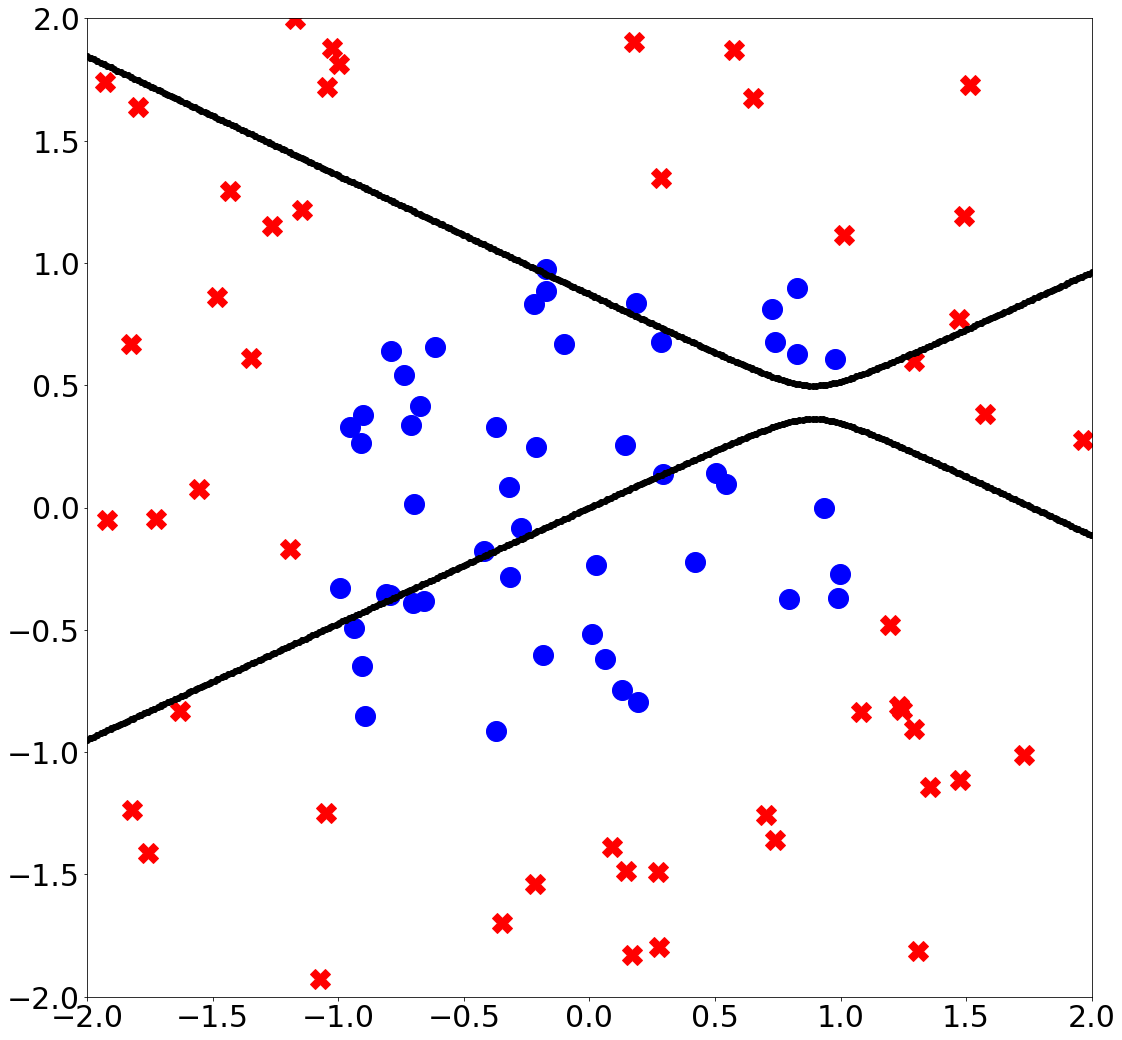

37


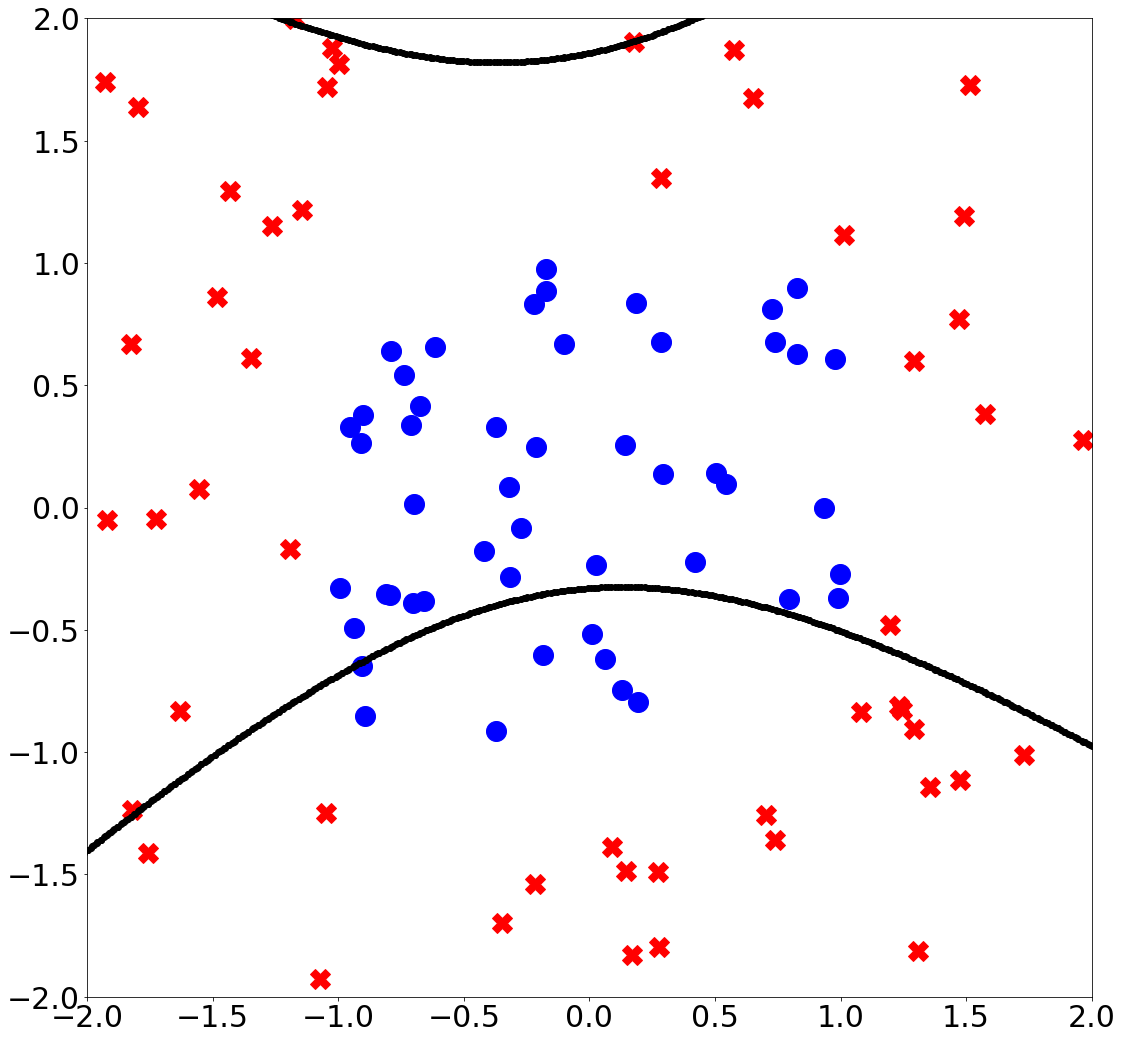

26


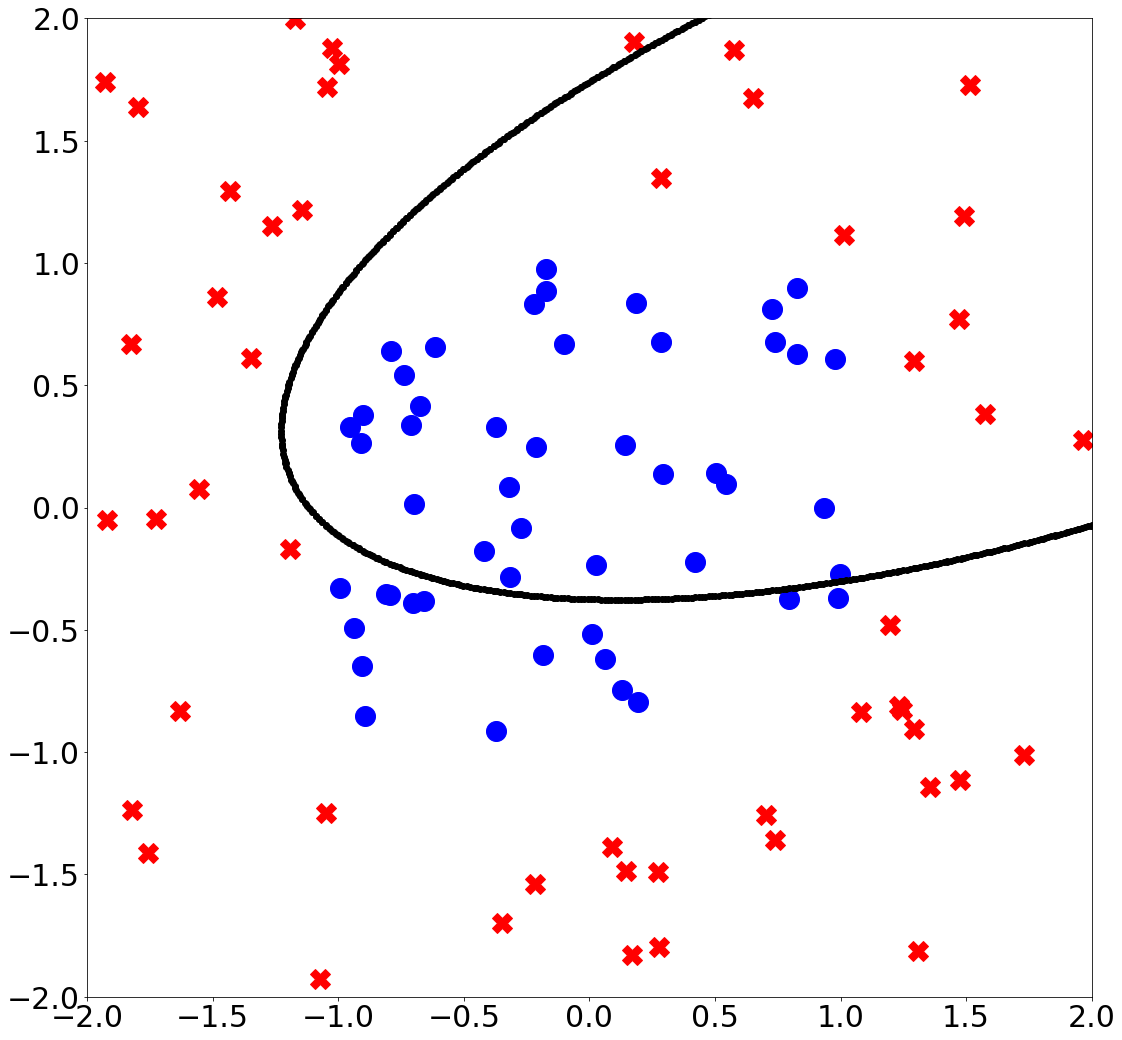

19


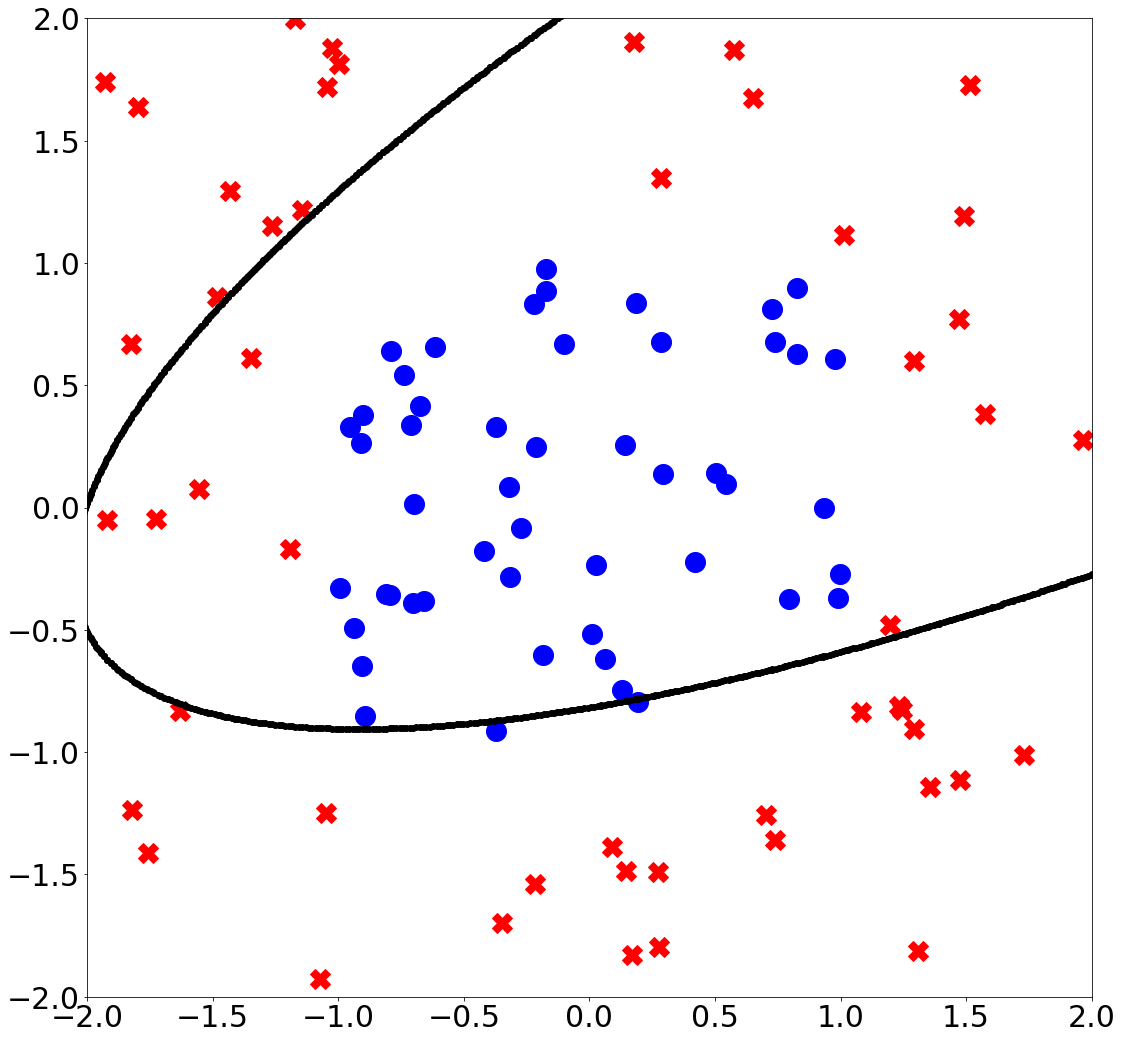

16


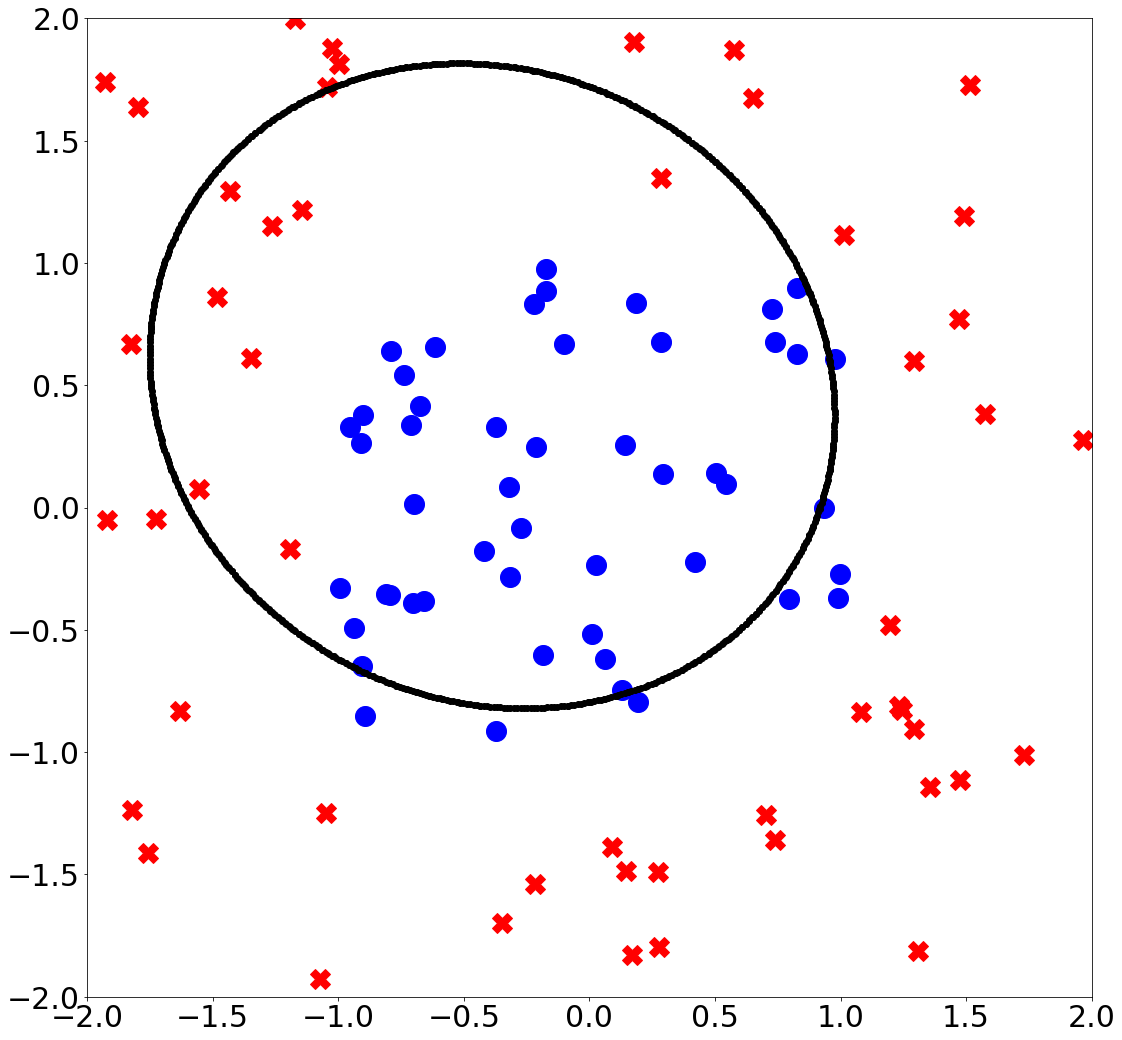

14


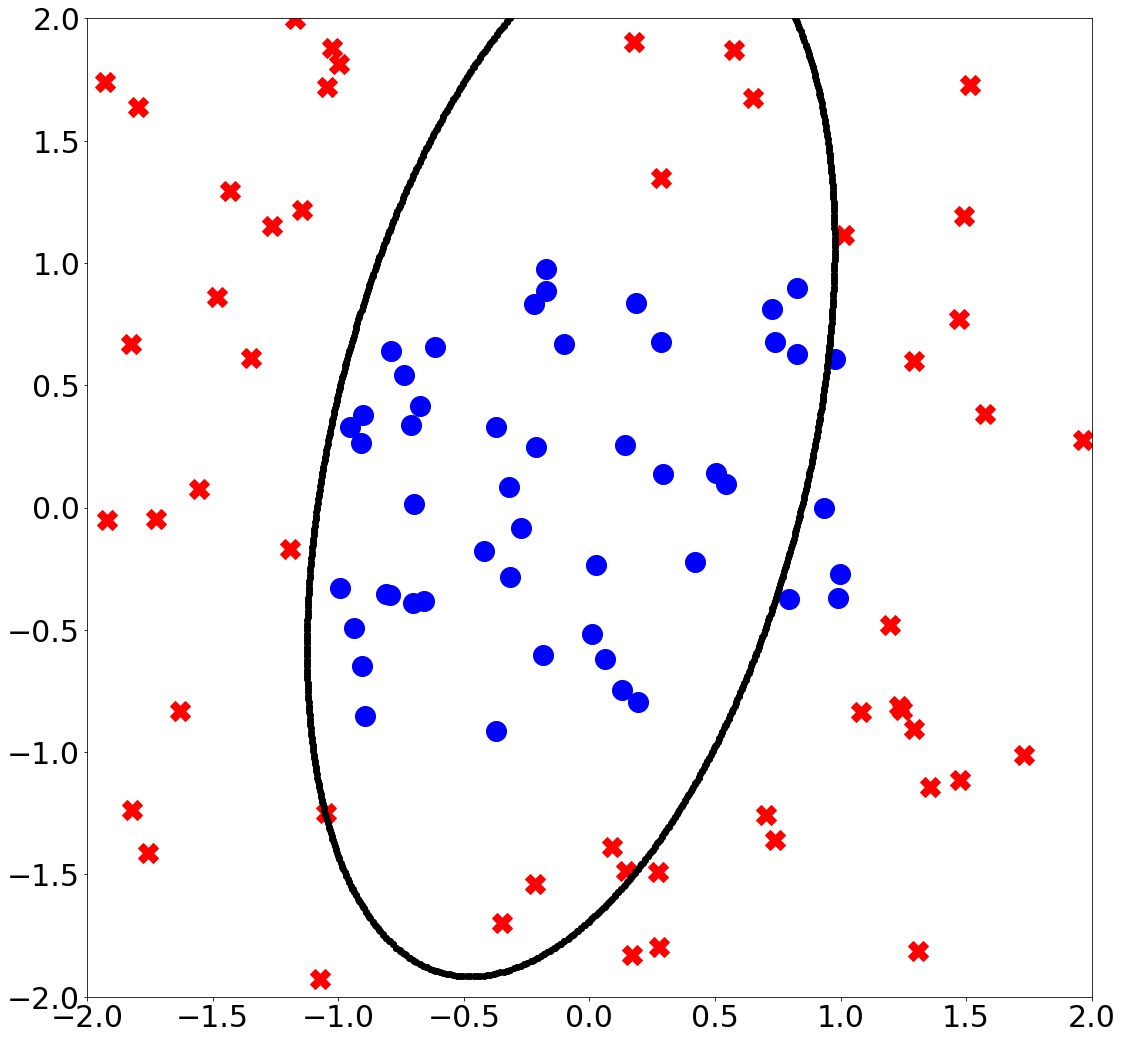

13


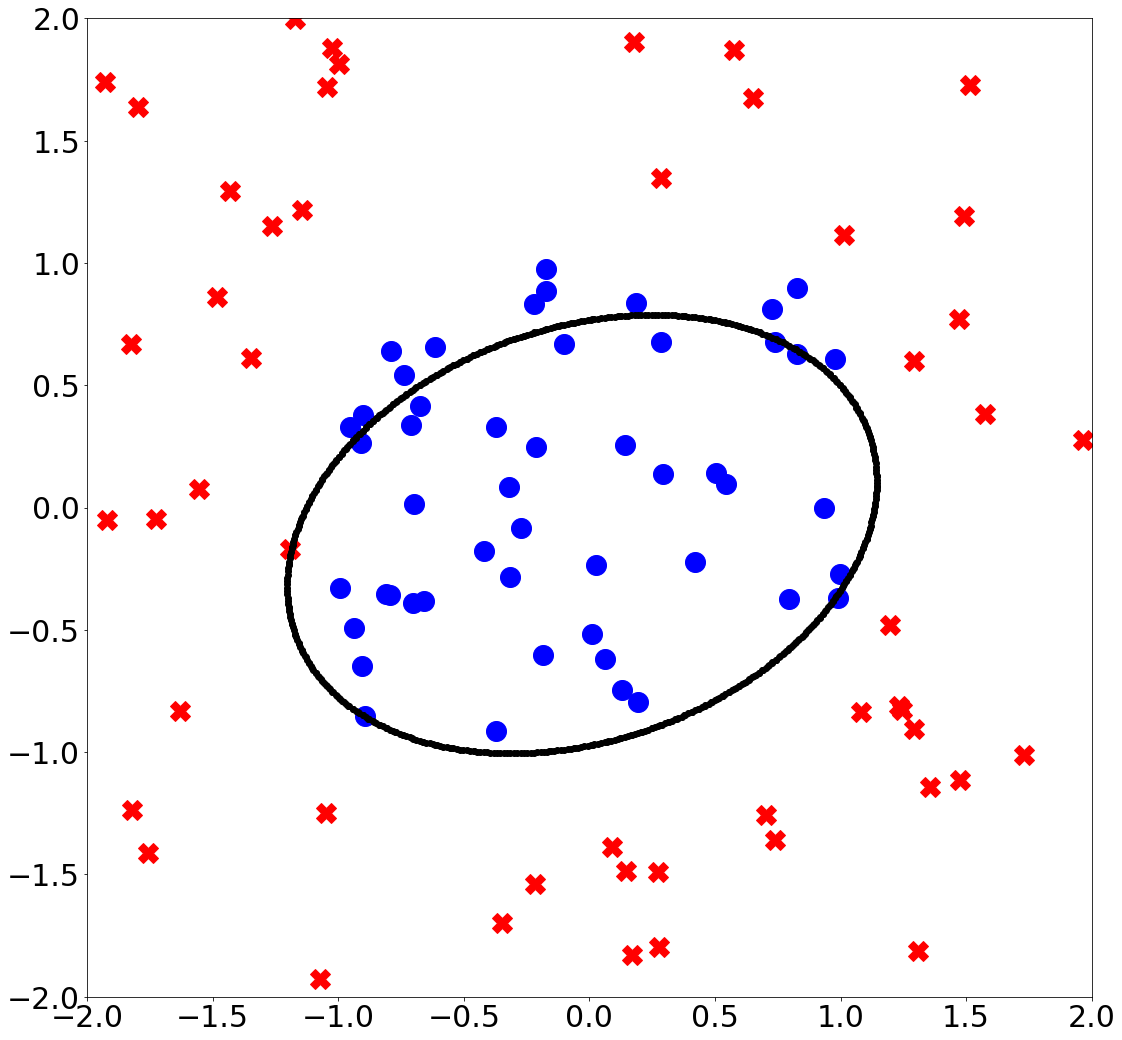

7


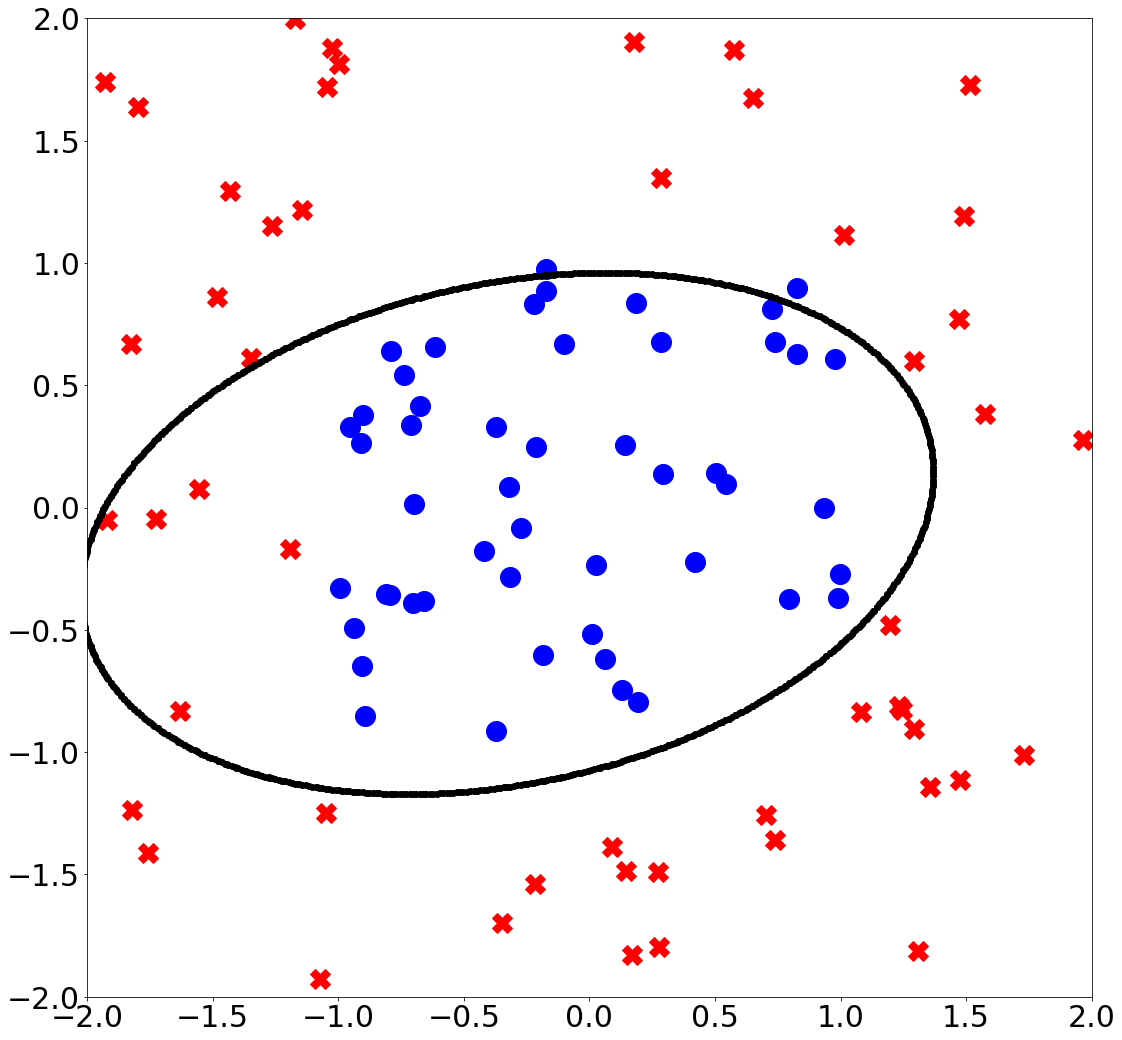

1


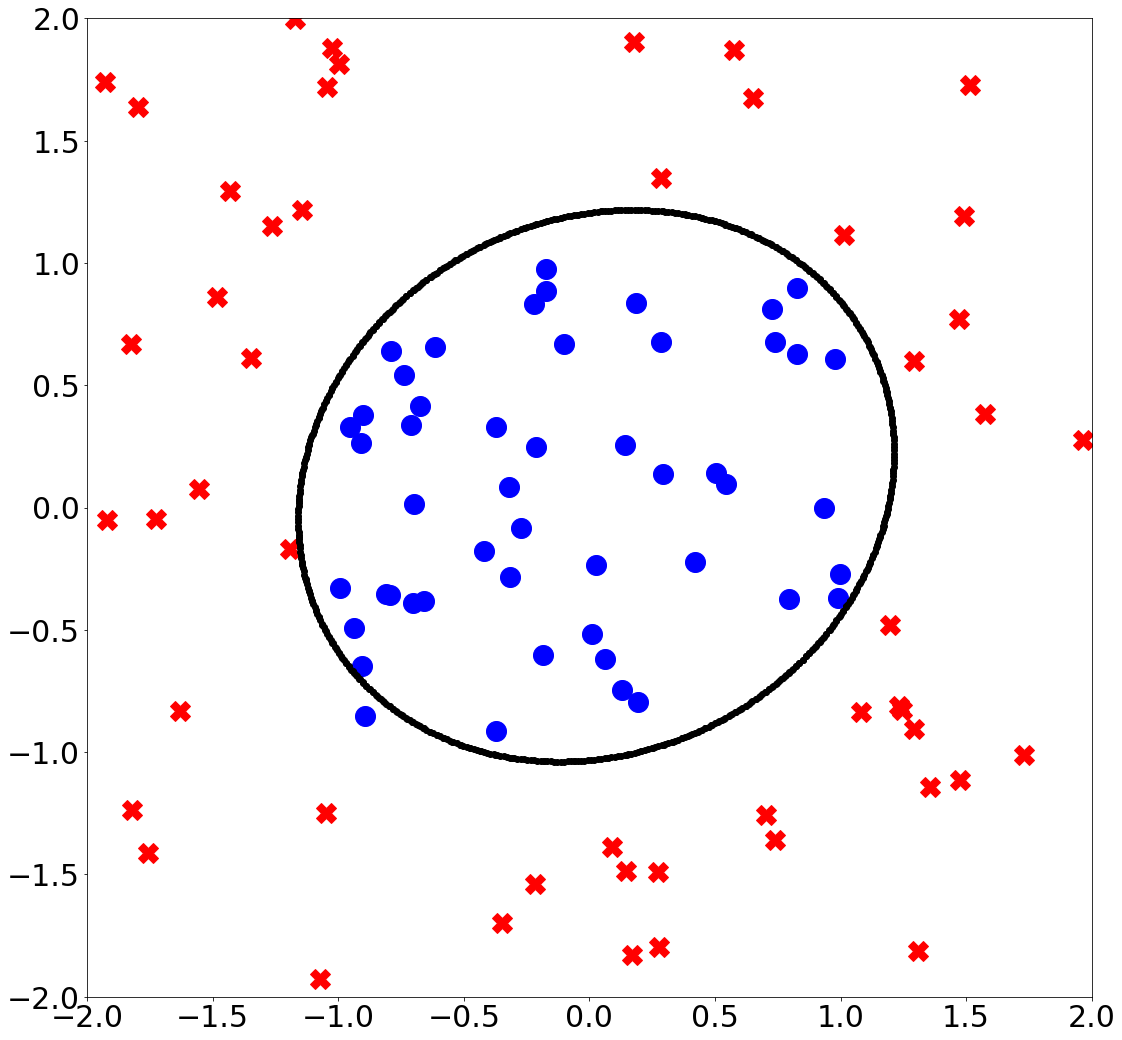

0


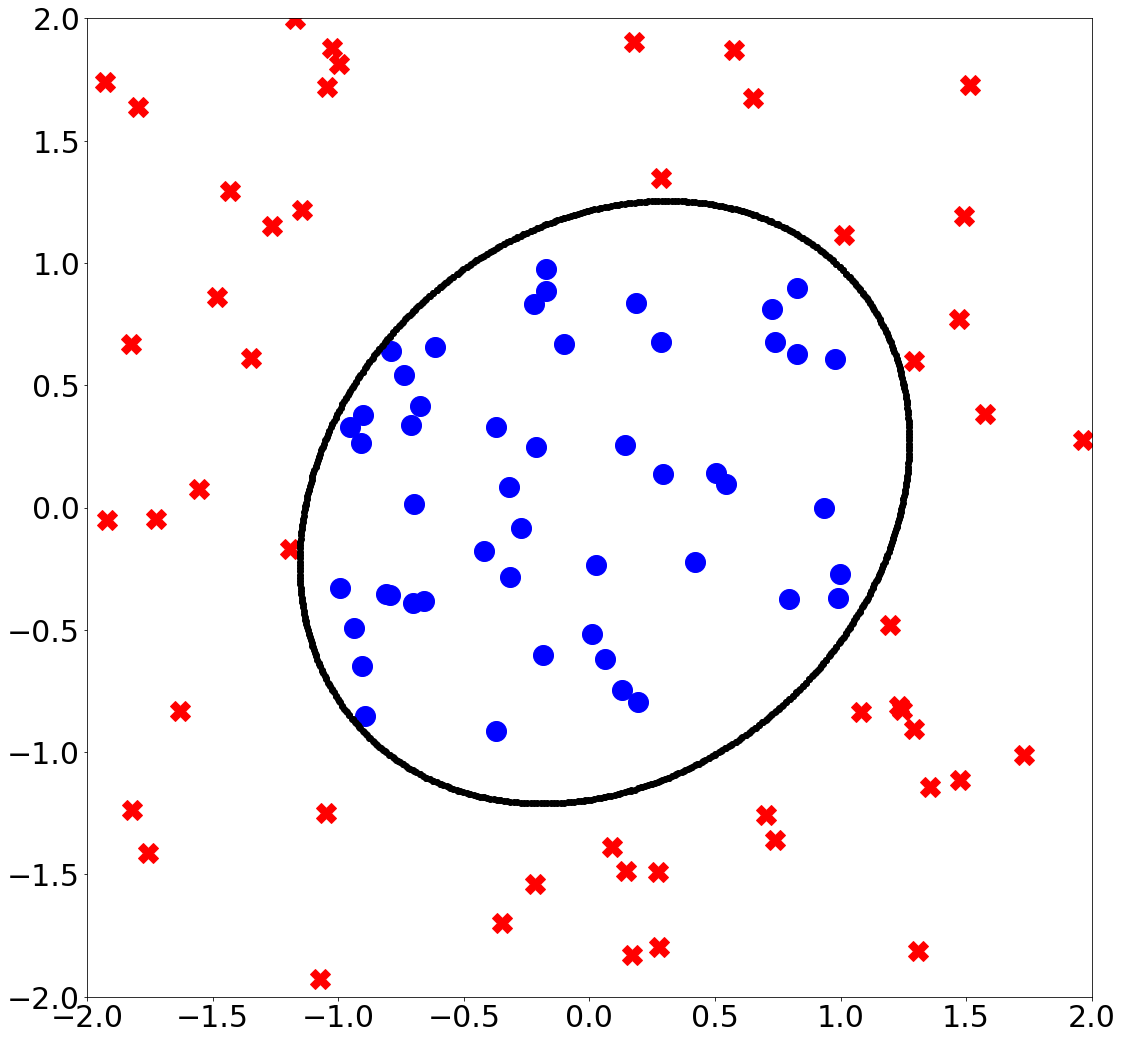

In [69]:
# 初始化權重w
w=np.zeros(6)
# 設定我們演算法要跑幾次
T=100
# 我們先計算初始狀況有積個分類錯誤
# 照理來說電腦一開始會把圈圈和叉叉全部
# 分在同一類，所以會有50個分類錯誤
error=compute_error(w,feat_x)
print(error)
# 開始迴圈
for t in range(0,T):
    # 這裡引入tmp_error用於比較上一次的error數量
    tmp_error=0
    # 隨機挑一個錯誤的點
    error_x,error_y=search_error(w,feat_x)
    # 更新我們的w
    w=w+error_y*error_x
    # 然後計算更新後的w，其錯誤的個數
    tmp_error=compute_error(w,feat_x)
    # 如果更新後錯誤率下降
    # 我們就更新我們的錯誤率
    # 並把它畫出來
    if(tmp_error<error):
        error=tmp_error
        print(error)
        plot_diagram(w,feat_x)
        # 如果沒有錯誤點就停止迴圈
        if(error==0):
            break
